In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

%matplotlib inline
pd.options.display.max_columns = None
# pd.options.display.max_rows = None

In [2]:
without_df = pd.read_csv("../data/zipcodes_df_final.csv")
without_df.head()

,zip_code,2011 total household,2011 household median income,2011 total families,2011 families median income,2011 total married couple families,2011 married couple families median income,2011 total non family households,2011 non family households median income,2015 total household,2015 household median income,2015 total families,2015 families median income,2015 total married couple families,2015 married couple families median income,2015 total non family households,2015 non family households median income,2020 total household,2020 household median income,2020 total families,2020 families median income,2020 total married couple families,2020 married couple families median income,2020 total non family households,2020 non family households median income,2011 population,2011 median age,2015 population,2015 median age,2020 population,2020 median age,"2011 Less than 50,000","2011 50,000-99,999","2011 100,000-149,999","2011 150,000-199,999","2011 200,000-299,999","2011 300,000-499,999","2011 500,000-999,999","2011 1,000,000-+",2011 Median Value,"2015 Less than 50,000","2015 50,000-99,999","2015 100,000-149,999","2015 150,000-199,999","2015 200,000-299,999","2015 300,000-499,999","2015 500,000-999,999","2015 1,000,000-+",2015 Median Value,"2020 Less than 50,000","2020 50,000-99,999","2020 100,000-149,999","2020 150,000-199,999","2020 200,000-299,999","2020 300,000-499,999","2020 500,000-999,999","2020 1,000,000-+",2020 Median Value
0,37013,"30,245","48,198","18,524","57,348","12,583","67,580","11,721","37,043","33,117","48,423","20,499","56,074","13,443","67,487","12,618","38,067","36,217","60,602","23,302","66,420","15,188","76,702","12,915","47,725","76,983",31.2,"90,073",31.8,"99,109",31.8,521,"1,374","7,447","5,266","2,712",472,166,39,"148,000",620,"1,800","6,982","5,845","2,160",481,149,66,"147,600",636,727,"2,716","5,454","7,622","2,623",241,188,"205,800"
1,37015,"6,577","45,018","4,545","53,102","3,186","63,900","2,032","26,038","6,734","47,253","4,615","58,831","3,550","67,551","2,119","30,930","6,821","59,144","4,743","64,059","3,414","73,448","2,078","34,010","16,976",38.6,"18,361",39.7,"17,835",41.5,497,858,"1,413","1,071",782,266,110,41,"139,100",399,972,"1,472",870,996,249,67,8,"139,800",258,562,"1,118",992,"1,253",625,185,0,"175,400"
2,37027,"17,346","113,696","13,954","131,049","12,646","140,678","3,392","49,671","18,642","119,570","15,150","139,167","13,725","148,871","3,492","54,059","20,608","133,254","15,670","162,549","14,144","172,821","4,938","62,997","48,067",41.0,"53,242",41.2,"57,096",41.8,117,95,318,679,"1,865","6,339","4,659","1,053","444,100",219,106,373,687,"1,702","6,300","5,644","1,014","456,000",159,49,177,262,911,"3,937","9,768","1,891","627,700"
3,37064,"17,869","72,798","13,549","87,741","11,289","100,782","4,320","38,988","19,527","80,898","14,783","99,522","12,328",(X),"4,744","38,965","21,795","105,342","16,861","122,202","14,497","133,614","4,934","43,996","48,318",39.3,"53,212",40.0,"60,272",40.8,393,376,903,"1,649","3,672","4,785","2,007",434,"303,500",527,312,"1,120","1,206","3,583","5,573","2,199",438,"319,200",236,70,318,522,"1,768","7,203","6,153",921,"460,900"
4,37072,"11,747","51,353","8,158","61,942","6,211","69,528","3,589","35,430","12,458","57,846","8,262","67,047","5,942",(X),"4,196","35,781","12,869","62,655","8,205","80,254","5,827","89,630","4,664","41,850","29,279",41.8,"31,392",42.6,"31,134",43.4,569,596,"1,748","2,277","1,697","1,088",257,20,"174,500",533,430,"1,918","2,232","1,838","1,186",183,59,"172,200",401,247,693,"1,677","3,288","2,160",353,50,"237,500"


In [3]:
without_df1 = without_df.replace(',', '', regex=True)
without_df1['zip_code'] = without_df1['zip_code'].astype(str)
without_df1
without_df1[['2011 Median Value', '2015 Median Value', '2020 Median Value']] = without_df1[['2011 Median Value', '2015 Median Value', '2020 Median Value']].astype(int)
without_df1.head()

,zip_code,2011 total household,2011 household median income,2011 total families,2011 families median income,2011 total married couple families,2011 married couple families median income,2011 total non family households,2011 non family households median income,2015 total household,2015 household median income,2015 total families,2015 families median income,2015 total married couple families,2015 married couple families median income,2015 total non family households,2015 non family households median income,2020 total household,2020 household median income,2020 total families,2020 families median income,2020 total married couple families,2020 married couple families median income,2020 total non family households,2020 non family households median income,2011 population,2011 median age,2015 population,2015 median age,2020 population,2020 median age,"2011 Less than 50,000","2011 50,000-99,999","2011 100,000-149,999","2011 150,000-199,999","2011 200,000-299,999","2011 300,000-499,999","2011 500,000-999,999","2011 1,000,000-+",2011 Median Value,"2015 Less than 50,000","2015 50,000-99,999","2015 100,000-149,999","2015 150,000-199,999","2015 200,000-299,999","2015 300,000-499,999","2015 500,000-999,999","2015 1,000,000-+",2015 Median Value,"2020 Less than 50,000","2020 50,000-99,999","2020 100,000-149,999","2020 150,000-199,999","2020 200,000-299,999","2020 300,000-499,999","2020 500,000-999,999","2020 1,000,000-+",2020 Median Value
0,37013,30245,48198,18524,57348,12583,67580,11721,37043,33117,48423,20499,56074,13443,67487,12618,38067,36217,60602,23302,66420,15188,76702,12915,47725,76983,31.2,90073,31.8,99109,31.8,521,1374,7447,5266,2712,472,166,39,148000,620,1800,6982,5845,2160,481,149,66,147600,636,727,2716,5454,7622,2623,241,188,205800
1,37015,6577,45018,4545,53102,3186,63900,2032,26038,6734,47253,4615,58831,3550,67551,2119,30930,6821,59144,4743,64059,3414,73448,2078,34010,16976,38.6,18361,39.7,17835,41.5,497,858,1413,1071,782,266,110,41,139100,399,972,1472,870,996,249,67,8,139800,258,562,1118,992,1253,625,185,0,175400
2,37027,17346,113696,13954,131049,12646,140678,3392,49671,18642,119570,15150,139167,13725,148871,3492,54059,20608,133254,15670,162549,14144,172821,4938,62997,48067,41.0,53242,41.2,57096,41.8,117,95,318,679,1865,6339,4659,1053,444100,219,106,373,687,1702,6300,5644,1014,456000,159,49,177,262,911,3937,9768,1891,627700
3,37064,17869,72798,13549,87741,11289,100782,4320,38988,19527,80898,14783,99522,12328,(X),4744,38965,21795,105342,16861,122202,14497,133614,4934,43996,48318,39.3,53212,40.0,60272,40.8,393,376,903,1649,3672,4785,2007,434,303500,527,312,1120,1206,3583,5573,2199,438,319200,236,70,318,522,1768,7203,6153,921,460900
4,37072,11747,51353,8158,61942,6211,69528,3589,35430,12458,57846,8262,67047,5942,(X),4196,35781,12869,62655,8205,80254,5827,89630,4664,41850,29279,41.8,31392,42.6,31134,43.4,569,596,1748,2277,1697,1088,257,20,174500,533,430,1918,2232,1838,1186,183,59,172200,401,247,693,1677,3288,2160,353,50,237500


In [4]:
without_df2 = without_df1[['zip_code', '2011 Median Value', '2015 Median Value', '2020 Median Value']]
without_df2.head()

,zip_code,2011 Median Value,2015 Median Value,2020 Median Value
0,37013,148000,147600,205800
1,37015,139100,139800,175400
2,37027,444100,456000,627700
3,37064,303500,319200,460900
4,37072,174500,172200,237500


In [5]:
without_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   zip_code           25 non-null     object
 1   2011 Median Value  25 non-null     int32 
 2   2015 Median Value  25 non-null     int32 
 3   2020 Median Value  25 non-null     int32 
dtypes: int32(3), object(1)
memory usage: 628.0+ bytes


In [6]:
without_df2['average growth'] = without_df2[['2011 Median Value', '2015 Median Value', '2020 Median Value']].mean(1).round()

without_df2['growth rate'] = (without_df2['2020 Median Value']-without_df2['2011 Median Value'])/without_df2['2011 Median Value']*100


without_df2

C:\Users\sarah\AppData\Local\Temp\ipykernel_28604\62972028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  without_df2['average growth'] = without_df2[['2011 Median Value', '2015 Median Value', '2020 Median Value']].mean(1).round()
C:\Users\sarah\AppData\Local\Temp\ipykernel_28604\62972028.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  without_df2['growth rate'] = (without_df2['2020 Median Value']-without_df2['2011 Median Value'])/without_df2['2011 Median Value']*100


,zip_code,2011 Median Value,2015 Median Value,2020 Median Value,average growth,growth rate
0,37013,148000,147600,205800,167133.0,39.054054
1,37015,139100,139800,175400,151433.0,26.096334
2,37027,444100,456000,627700,509267.0,41.342040
3,37064,303500,319200,460900,361200.0,51.861614
4,37072,174500,172200,237500,194733.0,36.103152
5,37076,156600,159800,230900,182433.0,47.445722
6,37080,158800,169000,227800,185200.0,43.450882
7,37086,134900,124200,178300,145800.0,32.171979
8,37115,123400,122700,184900,143667.0,49.837925
9,37122,210900,223700,307700,247433.0,45.898530


In [7]:
without_df3 = without_df2.nlargest(5, 'average growth')
without_df3

,zip_code,2011 Median Value,2015 Median Value,2020 Median Value,average growth,growth rate
19,37215,453300,510300,682600,548733.0,50.584602
2,37027,444100,456000,627700,509267.0,41.342040
15,37205,415100,443900,613300,490767.0,47.747531
17,37212,381000,433000,592800,468933.0,55.590551
23,37220,316600,346700,506500,389933.0,59.981049


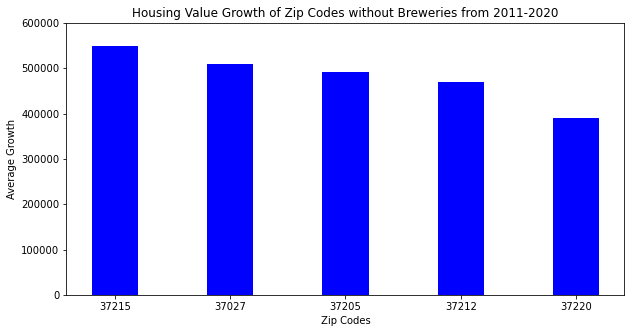

In [8]:
x = without_df3['zip_code']
y = without_df3['average growth']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y, color ='blue',
        width = 0.4)

plt.ylim(0,600000)
plt.xlabel("Zip Codes")
plt.ylabel("Average Growth")
plt.title("Housing Value Growth of Zip Codes without Breweries from 2011-2020")
plt.show();

In [9]:
without_df4 = without_df2.nlargest(5, 'growth rate')
without_df4

,zip_code,2011 Median Value,2015 Median Value,2020 Median Value,average growth,growth rate
14,37201,194600,208200,374500,259100.0,92.446043
23,37220,316600,346700,506500,389933.0,59.981049
21,37218,121000,128500,191900,147133.0,58.595041
17,37212,381000,433000,592800,468933.0,55.590551
16,37211,162400,162700,250900,192000.0,54.495074


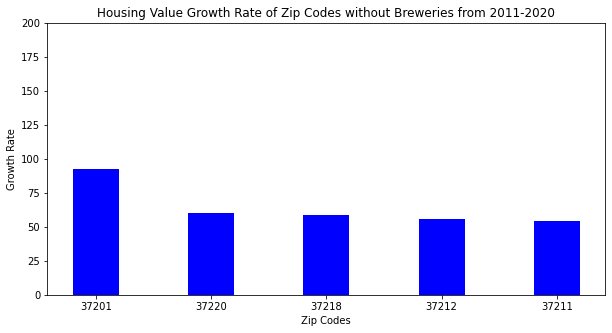

In [10]:
x = without_df4['zip_code']
y = without_df4['growth rate']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y, color ='blue',
        width = 0.4)
plt.ylim(0,200)
plt.xlabel("Zip Codes")
plt.ylabel("Growth Rate")
plt.title("Housing Value Growth Rate of Zip Codes without Breweries from 2011-2020")
plt.show();

In [11]:
with_df = pd.read_csv("../data/breweries_final_dataframe.csv")
with_df

with_df= with_df.replace('-', 0)

In [12]:
with_df1 = with_df.replace(',', '', regex=True)
with_df1['zip_code'] = with_df1['zip_code'].astype(str)
with_df1[['2011 Median Value', '2015 Median Value', '2020 Median Value']] = with_df1[['2011 Median Value', '2015 Median Value', '2020 Median Value']].astype(int)
with_df1.head()

,name,rating,review_count,address,city,zip_code,state,2011 total household,2011 household median income,2011 total families,2011 families median income,2011 total married couple families,2011 married couple families median income,2011 total non family households,2011 non family households median income,2015 total household,2015 household median income,2015 total families,2015 families median income,2015 total married couple families,2015 married couple families median income,2015 total non family households,2015 non family households median income,2020 total household,2020 household median income,2020 total families,2020 families median income,2020 total married couple families,2020 married couple families median income,2020 total non family households,2020 non family households median income,2011 population,2011 median age,2015 population,2015 median age,2020 population,2020 median age,"2011 Less than 50,000","2011 50,000-99,999","2011 100,000-149,999","2011 150,000-199,999","2011 200,000-299,999","2011 300,000-499,999","2011 500,000-999,999","2011 1,000,000-+",2011 Median Value,"2015 Less than 50,000","2015 50,000-99,999","2015 100,000-149,999","2015 150,000-199,999","2015 200,000-299,999","2015 300,000-499,999","2015 500,000-999,999","2015 1,000,000-+",2015 Median Value,"2020 Less than 50,000","2020 50,000-99,999","2020 100,000-149,999","2020 150,000-199,999","2020 200,000-299,999","2020 300,000-499,999","2020 500,000-999,999","2020 1,000,000-+",2020 Median Value,opening,neighborhood
0,Tennessee Brew Works,4.5,459,809 Ewing Ave,Nashville,37203,TN,4915,25852,1453,29018,653,60139,3462,24882,5777,33072,1876,45833,967,(X),3901,28461,10201,58032,1925,66527,1230,90441,8276,54482,10465,28.6,12068,29.6,16772,31.1,9,199,288,168,469,97,37,0,193900,40,161,156,198,439,272,167,5,235800,49,7,26,25,281,918,477,45,380200,2013,SoBro
1,Jackalope Brewing Company - The Ranch,4.5,47,429B Houston St,Nashville,37203,TN,4915,25852,1453,29018,653,60139,3462,24882,5777,33072,1876,45833,967,(X),3901,28461,10201,58032,1925,66527,1230,90441,8276,54482,10465,28.6,12068,29.6,16772,31.1,9,199,288,168,469,97,37,0,193900,40,161,156,198,439,272,167,5,235800,49,7,26,25,281,918,477,45,380200,2018,Wedgewood-Houston
2,New Heights Brewing Company,4.5,100,928 Rep John Lewis Way S,Nashville,37203,TN,4915,25852,1453,29018,653,60139,3462,24882,5777,33072,1876,45833,967,(X),3901,28461,10201,58032,1925,66527,1230,90441,8276,54482,10465,28.6,12068,29.6,16772,31.1,9,199,288,168,469,97,37,0,193900,40,161,156,198,439,272,167,5,235800,49,7,26,25,281,918,477,45,380200,2016,South Nashville
3,Southern Grist Brewing,4.5,204,754 Douglas Ave,Nashville,37207,TN,12745,30780,8341,33203,3407,55298,4404,23750,13591,32396,8385,35720,3648,59621,5206,25157,15151,50583,9113,53671,4155,76397,6038,40773,32074,34.2,35497,34.9,39151,35.4,645,1638,3007,1253,536,115,24,13,117600,577,2007,2774,1389,656,247,9,30,120900,602,658,1882,1707,2294,1360,210,80,186700,2016,Cleveland Park
4,East Nashville Beer Works,4.0,111,320 E Trinity Ln,Nashville,37207,TN,12745,30780,8341,33203,3407,55298,4404,23750,13591,32396,8385,35720,3648,59621,5206,25157,15151,50583,9113,53671,4155,76397,6038,40773,32074,34.2,35497,34.9,39151,35.4,645,1638,3007,1253,536,115,24,13,117600,577,2007,2774,1389,656,247,9,30,120900,602,658,1882,1707,2294,1360,210,80,186700,2016,East Nashville


In [13]:
with_df2 = with_df1[['zip_code', '2011 Median Value','2015 Median Value','2020 Median Value']].drop_duplicates()
with_df2

,zip_code,2011 Median Value,2015 Median Value,2020 Median Value
0,37203,193900,235800,380200
3,37207,117600,120900,186700
5,37208,106900,115700,288100
7,37204,302800,358300,602500
8,37209,169200,188000,351600
13,37206,157700,193200,359600
15,37210,113400,118500,227100
16,37216,142600,158700,293800
17,37213,0,0,0
18,37228,0,0,0


In [14]:
with_df2['average growth'] = with_df2[['2011 Median Value', '2015 Median Value', '2020 Median Value']].mean(1).round()

with_df2['growth rate'] = (with_df2['2020 Median Value']-with_df2['2011 Median Value'])/with_df2['2011 Median Value']*100

with_df2

,zip_code,2011 Median Value,2015 Median Value,2020 Median Value,average growth,growth rate
0,37203,193900,235800,380200,269967.0,96.080454
3,37207,117600,120900,186700,141733.0,58.758503
5,37208,106900,115700,288100,170233.0,169.504210
7,37204,302800,358300,602500,421200.0,98.976222
8,37209,169200,188000,351600,236267.0,107.801418
13,37206,157700,193200,359600,236833.0,128.027901
15,37210,113400,118500,227100,153000.0,100.264550
16,37216,142600,158700,293800,198367.0,106.030856
17,37213,0,0,0,0.0,NaN
18,37228,0,0,0,0.0,NaN


In [15]:
with_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 18
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   zip_code           10 non-null     object 
 1   2011 Median Value  10 non-null     int32  
 2   2015 Median Value  10 non-null     int32  
 3   2020 Median Value  10 non-null     int32  
 4   average growth     10 non-null     float64
 5   growth rate        8 non-null      float64
dtypes: float64(2), int32(3), object(1)
memory usage: 440.0+ bytes


In [16]:
with_df3 = with_df2.nlargest(5, 'average growth')
with_df3

,zip_code,2011 Median Value,2015 Median Value,2020 Median Value,average growth,growth rate
7,37204,302800,358300,602500,421200.0,98.976222
0,37203,193900,235800,380200,269967.0,96.080454
13,37206,157700,193200,359600,236833.0,128.027901
8,37209,169200,188000,351600,236267.0,107.801418
16,37216,142600,158700,293800,198367.0,106.030856


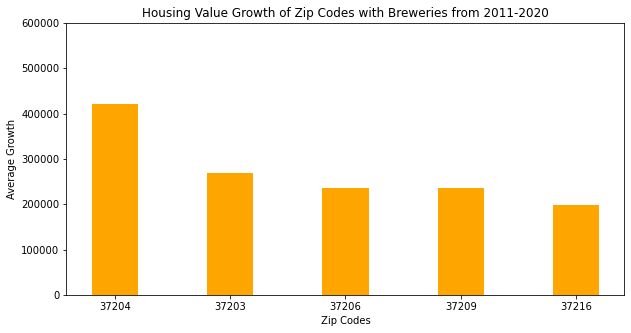

In [17]:
x = with_df3['zip_code']
y = with_df3['average growth']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y, color ='orange',
        width = 0.4)

plt.ylim(0,600000)
plt.xlabel("Zip Codes")
plt.ylabel("Average Growth")
plt.title("Housing Value Growth of Zip Codes with Breweries from 2011-2020")
plt.show();

In [18]:
with_df4 = with_df2.nlargest(5, 'growth rate')
with_df4

,zip_code,2011 Median Value,2015 Median Value,2020 Median Value,average growth,growth rate
5,37208,106900,115700,288100,170233.0,169.504210
13,37206,157700,193200,359600,236833.0,128.027901
8,37209,169200,188000,351600,236267.0,107.801418
16,37216,142600,158700,293800,198367.0,106.030856
15,37210,113400,118500,227100,153000.0,100.264550


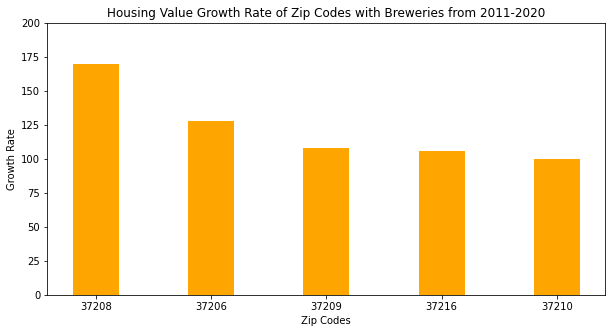

In [19]:
x = with_df4['zip_code']
y = with_df4['growth rate']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y, color ='orange',
        width = 0.4)

plt.ylim(0,200)
plt.xlabel("Zip Codes")
plt.ylabel("Growth Rate")
plt.title("Housing Value Growth Rate of Zip Codes with Breweries from 2011-2020")
plt.show();